<a href="https://colab.research.google.com/github/luctrindade/Jogo-da-velha/blob/main/rascunhoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from scipy.stats import skew

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dados = pd.read_csv("/content/diabetes_dataset.csv")

In [ ]:
dados

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
567,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
568,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
569,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
570,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
dados.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
5,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0


In [ ]:
dados.info()
dados.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               572 non-null    int64  
 1   Glucose                   567 non-null    float64
 2   BloodPressure             537 non-null    float64
 3   SkinThickness             345 non-null    float64
 4   Insulin                   198 non-null    float64
 5   BMI                       561 non-null    float64
 6   DiabetesPedigreeFunction  572 non-null    float64
 7   Age                       572 non-null    int64  
 8   Outcome                   572 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 40.3 KB


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
modificar = dados.dropna()
r = modificar.isna().sum()
print(r)
modificar.shape

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


(196, 9)

In [ ]:
skewness = skew(modificar['Insulin'], nan_policy='omit')  # Ignora valores NaN

print(f"Skewness da Insulin: {skewness:.2f}")
dados['Insulin_log'] = np.log1p(dados['Insulin'])

Skewness da Insulin: 2.13


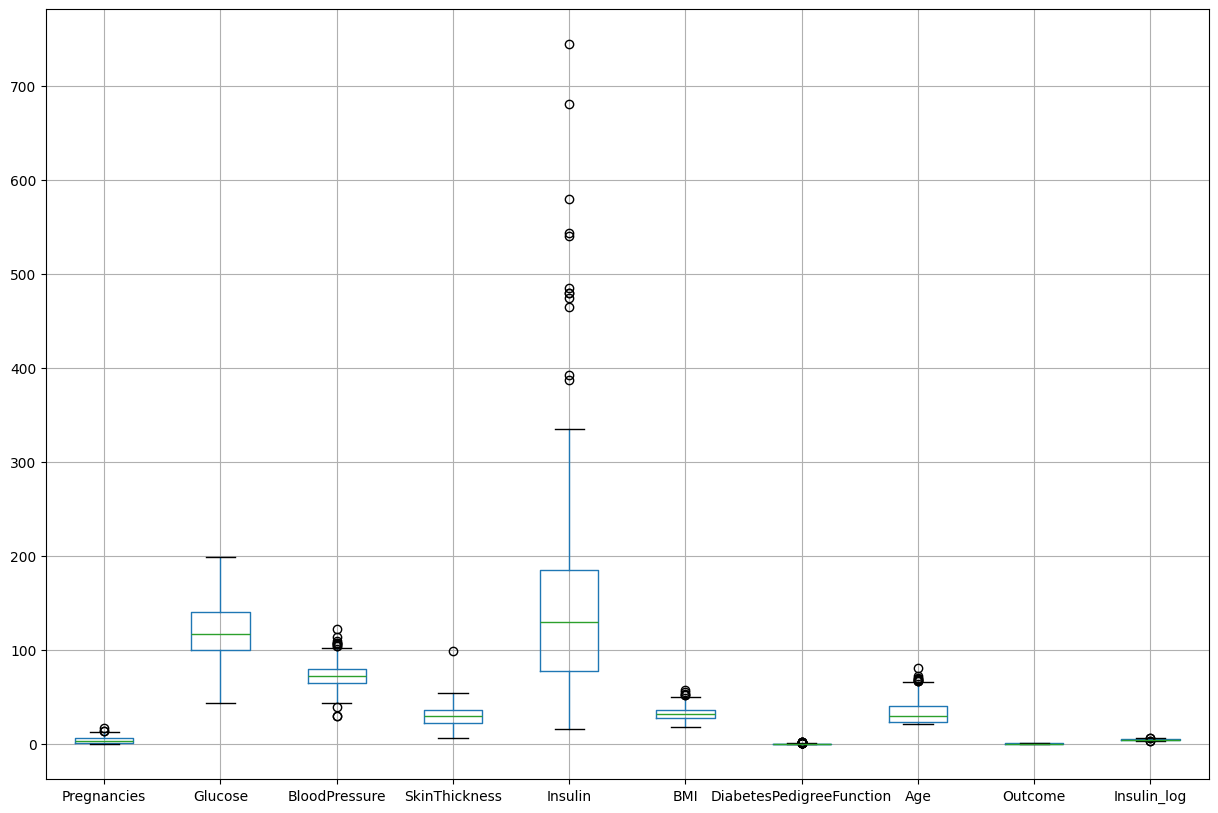

In [ ]:
dados.boxplot(figsize=(15,10))
plt.show()

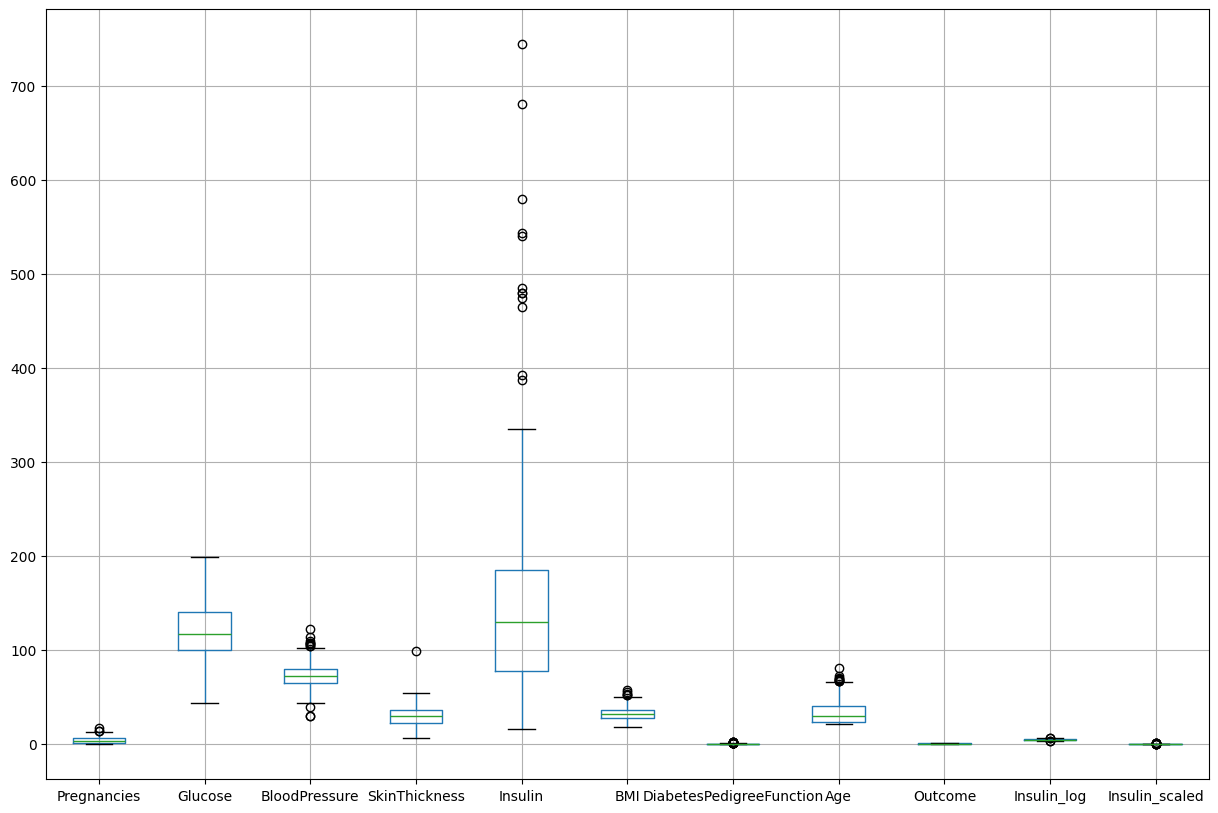

(572, 11)

In [ ]:
scaler = MinMaxScaler()
dados['Insulin_scaled'] = scaler.fit_transform(dados[['Insulin']])
dados.boxplot(figsize=(15,10))
plt.show()
dados.shape

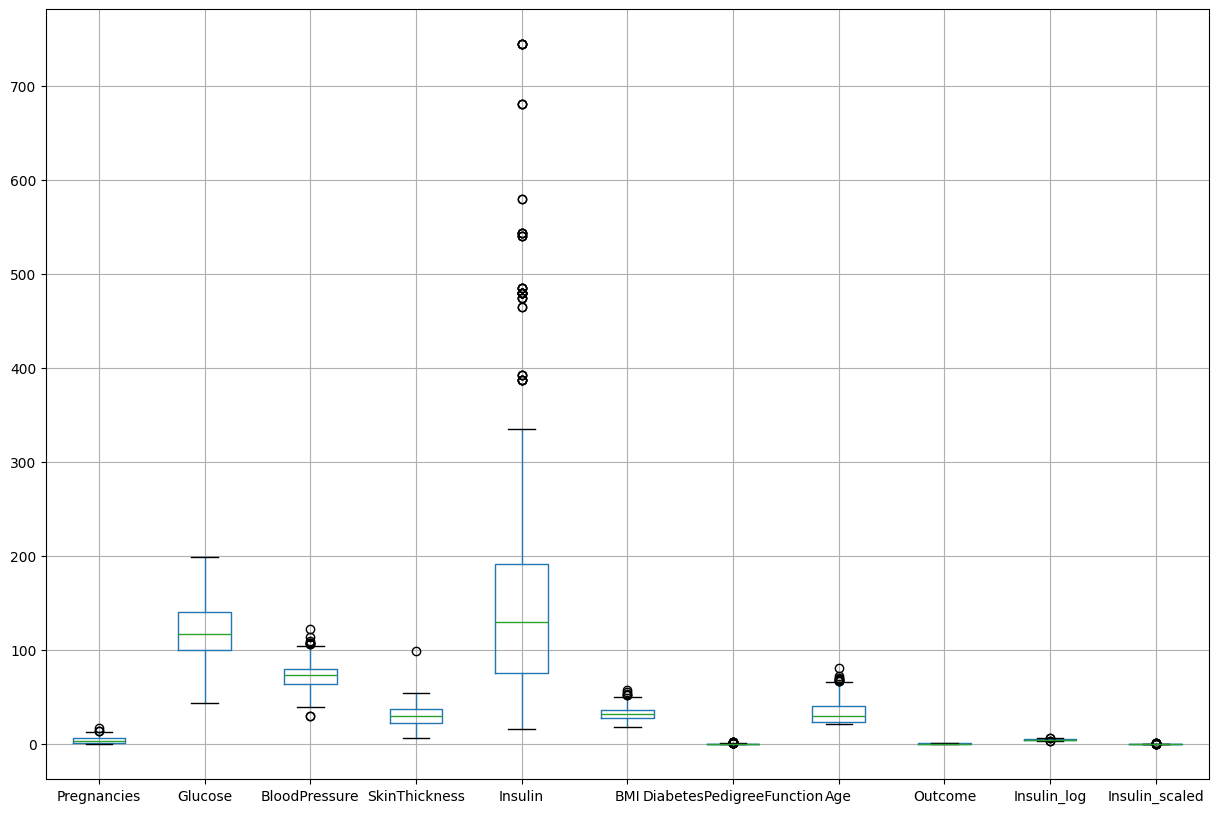

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0
Insulin_log,374


In [ ]:


# Criar uma cópia do dataframe para não modificar o original
df_imputed = dados.copy()

# Preencher valores ausentes com amostragem da distribuição original
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    non_null_values = df_imputed[column].dropna().values  # Pegar apenas os valores existentes
    df_imputed[column] = df_imputed[column].apply(lambda x: np.random.choice(non_null_values) if pd.isnull(x) else x)

# Verificar se ainda existem valores ausentes após a imputação
missing_after_imputation = df_imputed.isnull().sum()
df_imputed.boxplot(figsize=(15,10))
plt.show()
missing_after_imputation


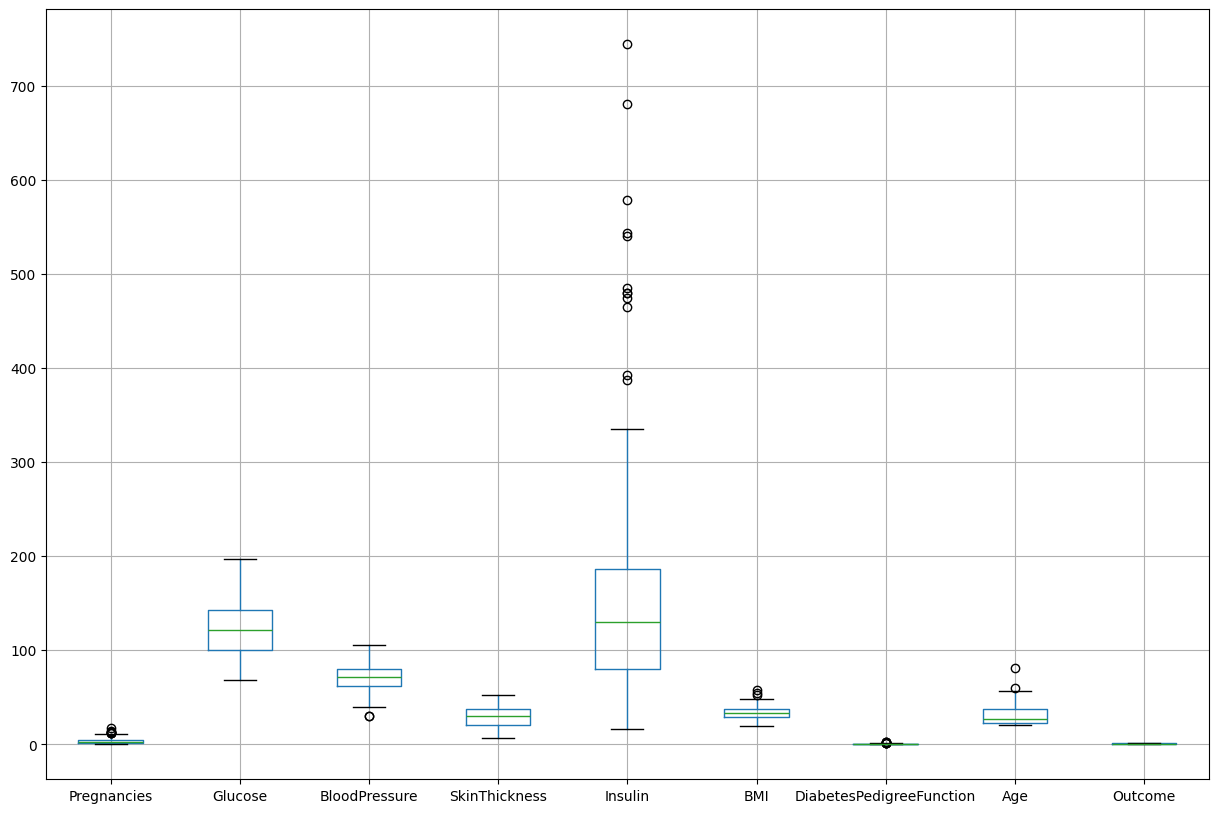

In [ ]:
modificar.boxplot(figsize=(15,10))
plt.show()

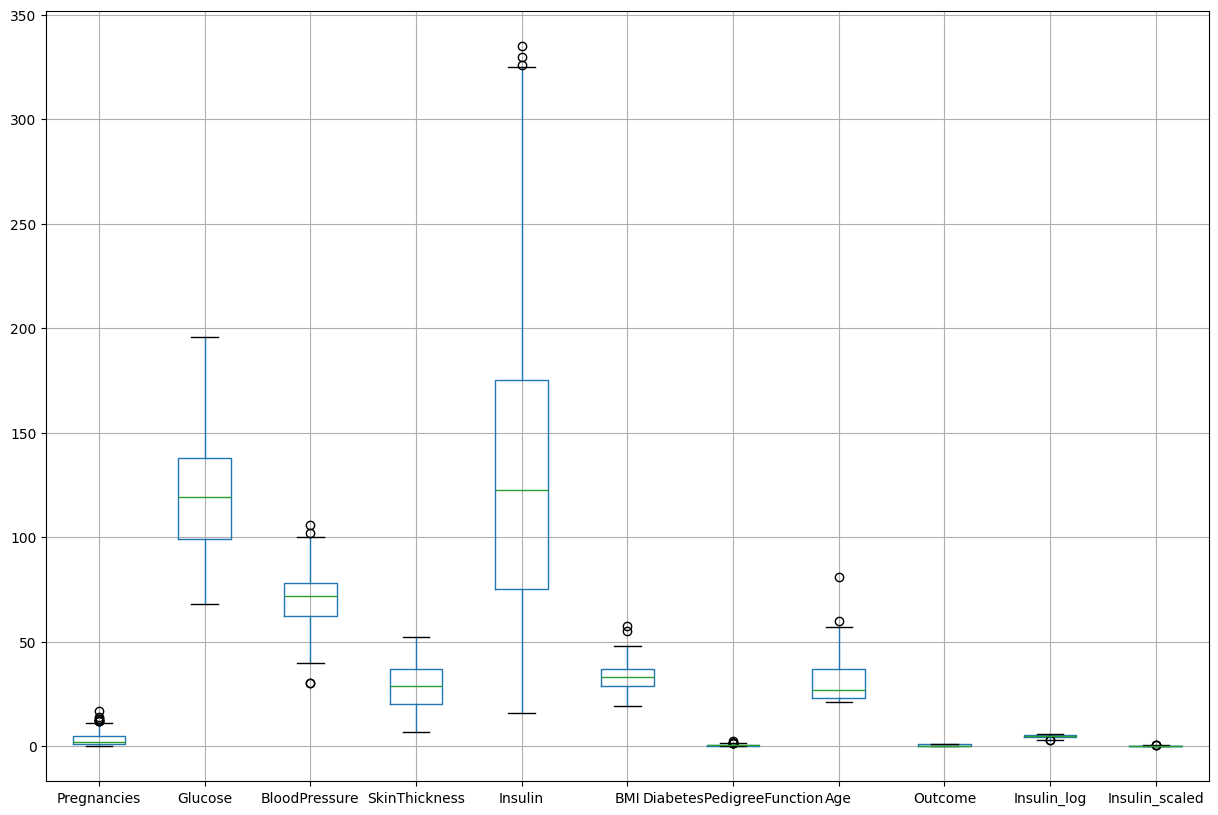

(196, 10)

In [ ]:
Q1 = dados['Insulin'].quantile(0.25)
Q3 = dados['Insulin'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover outliers
dados_sem_outliers = dados[(dados['Insulin'] >= limite_inferior) & (dados['Insulin'] <= limite_superior)]
# Aplicando no dataset
dados_sem_outliers.boxplot(figsize=(15,10))
plt.show()
modificar.shape


In [ ]:
dados.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,572.000000,567.000000,537.000000,345.000000,198.000000,561.000000,572.000000,572.000000,572.000000
mean,4.106643,121.647266,73.150838,29.356522,156.934343,32.327629,0.459121,34.043706,0.358392
std,3.446995,30.132084,12.347184,10.433503,119.066934,6.735437,0.336124,12.103893,0.479948
min,0.000000,44.000000,30.000000,7.000000,16.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,65.000000,22.000000,77.500000,27.500000,0.236000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.000000,129.500000,32.000000,0.344500,30.000000,0.000000
75%,6.000000,140.000000,80.000000,36.000000,185.000000,36.600000,0.605500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,57.300000,2.329000,81.000000,1.000000


In [ ]:
dados.groupby('Insulin').describe().transpose()

Insulin            16.0   18.0   22.0      23.0   36.0   37.0   40.0   42.0   \
Pregnancies count    1.0    1.0    1.0  2.000000    1.0    1.0    1.0    1.0   
            mean     2.0    1.0    5.0  3.000000    1.0    1.0    0.0    5.0   
            std      NaN    NaN    NaN  2.828427    NaN    NaN    NaN    NaN   
            min      2.0    1.0    5.0  1.000000    1.0    1.0    0.0    5.0   
            25%      2.0    1.0    5.0  2.000000    1.0    1.0    0.0    5.0   
...                  ...    ...    ...       ...    ...    ...    ...    ...   
Outcome     min      0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0   
            25%      0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0   
            50%      0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0   
            75%      0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0   
            max      0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0   

Insulin               44.0      45.0   ...  392.0  465.0  474.0     480.0  \
Pregnancies count  2.000000  2.000000  ...    1.0    1.0    1.0  2.000000   
            mean   1.500000  2.000000  ...    7.0    3.0    3.0  4.000000   
            std    0.707107  1.414214  ...    NaN    NaN    NaN  4.242641   
            min    1.000000  1.000000  ...    7.0    3.0    3.0  1.000000   
            25%    1.250000  1.500000  ...    7.0    3.0    3.0  2.500000   
...                     ...       ...  ...    ...    ...    ...       ...   
Outcome     min    0.000000  0.000000  ...    1.0    1.0    1.0  0.000000   
            25%    0.000000  0.000000  ...    1.0    1.0    1.0  0.250000   
            50%    0.000000  0.000000  ...    1.0    1.0    1.0  0.500000   
            75%    0.000000  0.000000  ...    1.0    1.0    1.0  0.750000   
            max    0.000000  0.000000  ...    1.0    1.0    1.0  1.000000   

Insulin            485.0  540.0  543.0  579.0  680.0  744.0  
Pregnancies count    1.0    1.0    1.0    1.0    1.0    1.0  
            mean     1.0    2.0    2.0    1.0    0.0    4.0  
            std      NaN    NaN    NaN    NaN    NaN    NaN  
            min      1.0    2.0    2.0    1.0    0.0    4.0  
            25%      1.0    2.0    2.0    1.0    0.0    4.0  
...                  ...    ...    ...    ...    ...    ...  
Outcome     min      0.0    1.0    1.0    1.0    0.0    0.0  
            25%      0.0    1.0    1.0    1.0    0.0    0.0  
            50%      0.0    1.0    1.0    1.0    0.0    0.0  
            75%      0.0    1.0    1.0    1.0    0.0    0.0  
            max      0.0    1.0    1.0    1.0    0.0    0.0  

[64 rows x 124 columns]

In [ ]:
dados.shape

(572, 9)

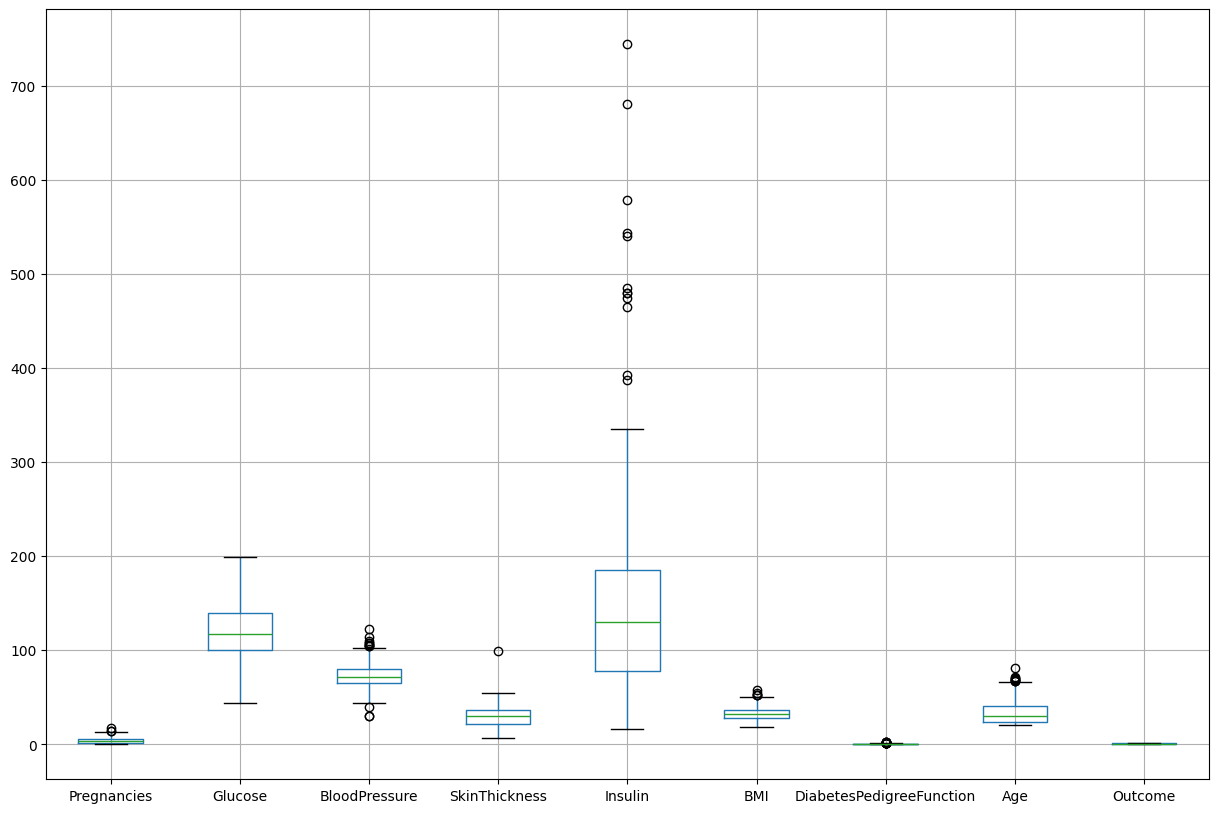

In [ ]:
dados.boxplot(figsize=(15,10))
plt.show()

In [ ]:
falta = dados.isnull().sum()
falta.head(9)

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
falta_perce = (dados.isnull().sum() / len(dados['Age']))*100
print(falta_perce)

Pregnancies                  0.000000
Glucose                      0.874126
BloodPressure                6.118881
SkinThickness               39.685315
Insulin                     65.384615
BMI                          1.923077
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


In [ ]:
dados.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,0
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
dados

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,156.934343,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,156.934343,26.6,0.351,31,0
2,8,183.0,64.0,29.356522,156.934343,23.3,0.672,32,1
3,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
4,5,116.0,74.0,29.356522,156.934343,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
567,9,89.0,62.0,29.356522,156.934343,22.5,0.142,33,0
568,2,122.0,70.0,27.000000,156.934343,36.8,0.340,27,0
569,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
570,1,126.0,60.0,29.356522,156.934343,30.1,0.349,47,1
